In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = 'mushroom.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head()

class cap-shape cap-surface cap-color ruises odor gill-attachment  \
0     e         x           f         n      f    n               f   
1     p       NaN           y         g      t  NaN               f   
2     e         b           y         n      t    n               f   
3     e         x           g         g      t    n               f   
4     e       NaN           f       NaN      t    n               a   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            w         n          b  ...                        y   
1            c         b          k  ...                        s   
2            c       NaN          n  ...                        s   
3            w         b          n  ...                        s   
4            w         n          n  ...                        k   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      p       NaN          n   
1                      n                      c         p          w   
2                      p                    NaN         p          w   
3                      p                    NaN         p          w   
4                    NaN                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 w          v     NaN  
1           n         e               NaN          y       g  
2           o         p                 b          y       w  
3           n         n               NaN        NaN       d  
4         NaN         l                 w          v       d  

[5 rows x 23 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     25986 non-null  object
 1   cap-shape                 22513 non-null  object
 2   cap-surface               22507 non-null  object
 3   cap-color                 22527 non-null  object
 4   ruises                    22514 non-null  object
 5   odor                      22536 non-null  object
 6   gill-attachment           22505 non-null  object
 7   gill-spacing              22587 non-null  object
 8   gill-size                 22494 non-null  object
 9   gill-color                22418 non-null  object
 10  stalk-shape               22512 non-null  object
 11  stalk-root                22458 non-null  object
 12  stalk-surface-above-ring  22478 non-null  object
 13  stalk-surface-below-ring  22563 non-null  object
 14  stalk-color-above-ring

In [4]:
data.isnull().sum()

class                          0
cap-shape                   3473
cap-surface                 3479
cap-color                   3459
ruises                      3472
odor                        3450
gill-attachment             3481
gill-spacing                3399
gill-size                   3492
gill-color                  3568
stalk-shape                 3474
stalk-root                  3528
stalk-surface-above-ring    3508
stalk-surface-below-ring    3423
stalk-color-above-ring      3573
stalk-color-below-ring      3433
veil-type                   3497
veil-color                  3503
ring-number                 3489
ring-type                   3508
spore-print-color           3493
population                  3511
habitat                     3484
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)
data.shape

(25986, 23)

In [6]:
data = data.fillna(data.mode().iloc[0])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     25986 non-null  object
 1   cap-shape                 25986 non-null  object
 2   cap-surface               25986 non-null  object
 3   cap-color                 25986 non-null  object
 4   ruises                    25986 non-null  object
 5   odor                      25986 non-null  object
 6   gill-attachment           25986 non-null  object
 7   gill-spacing              25986 non-null  object
 8   gill-size                 25986 non-null  object
 9   gill-color                25986 non-null  object
 10  stalk-shape               25986 non-null  object
 11  stalk-root                25986 non-null  object
 12  stalk-surface-above-ring  25986 non-null  object
 13  stalk-surface-below-ring  25986 non-null  object
 14  stalk-color-above-ring

In [8]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

<Axes: >

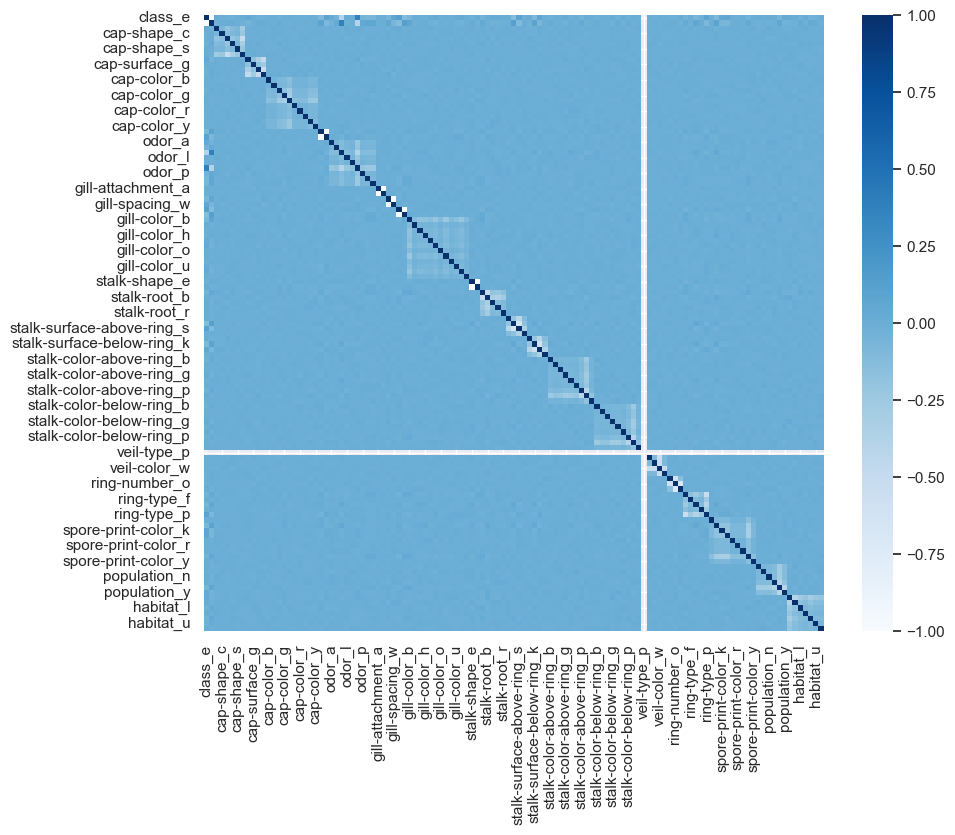

In [9]:
import seaborn as sns

data_encoded = pd.get_dummies(data)

corr = data_encoded.corr()

sns.set(rc={'figure.figsize': (10, 8)})

sns.heatmap(corr, cmap="Blues")

In [10]:
X = data.drop('class', axis=1)
y = data['class']

In [11]:
X_encoded = one_hot_encoder.fit_transform(X)

In [12]:
encoded_columns = one_hot_encoder.get_feature_names_out(X.columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Specify the positive class label
positive_class = 'e'  # or 'p', depending on your context

# Calculate metrics with the specified positive class
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label=positive_class)
recall = recall_score(y_test, y_pred_svm, pos_label=positive_class)
f1 = f1_score(y_test, y_pred_svm, pos_label=positive_class)
confusion = confusion_matrix(y_test, y_pred_svm)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)

# Show predictions
print("Predictions:", y_pred_svm)

Accuracy: 0.7424009234320893
Precision: 0.7345565749235474
Recall: 0.8360598677340759
F1 Score: 0.7820283249226763
Confusion Matrix:
 [[2402  471]
 [ 868 1457]]
Predictions: ['p' 'p' 'e' ... 'p' 'e' 'e']
